<a href="https://colab.research.google.com/github/ryanhuizar/Invasion-Analysis/blob/main/EHOP016_Dose_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load the data 
from google.colab import files 
uploaded = files.upload()

df = pd.read_csv('Ehop016 Dose Curves_PyMT.csv')
df.head(7) #give first 7 rows of data 

#Notes about data: 
#Replicate needs to be switched to categorical variable.
#Several columns can be removed: special, file. 
#Need to make column to transform circularity into (1/circularity) 


Saving Ehop016 Dose Curves_PyMT.csv to Ehop016 Dose Curves_PyMT.csv


,Replicate,Date Imaged,Mouse_model,Matrix_comp,Dose (nM),Organoid #,File,invasive_strands,peripheral_cells,Label,Area,Circularity,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM.czi,0,8,dead,36746.567,0.829,1.480,0.676,0.964
1,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM-02.czi,0,0,dead,56715.497,0.914,1.092,0.916,0.979
2,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM-03.czi,0,0,dead,27155.989,0.804,1.496,0.669,0.958
3,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM-04.czi,0,0,dead,59114.069,0.835,1.345,0.743,0.966
4,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM-05.czi,0,0,dead,21208.718,0.838,1.190,0.840,0.962
5,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM-06.czi,0,12,dead,124510.553,0.799,1.231,0.812,0.947
6,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM-07.czi,0,0,dead,41745.910,0.813,1.631,0.613,0.963


In [ ]:
print('the shape of the data is ', df.shape) #400 entries, 15 columns. 
print(df.isna().sum()) #number of NaN values for each column

the shape of the data is  (94, 15)
Replicate            0
Date Imaged          0
Mouse_model          0
Matrix_comp          0
Dose (nM)            0
Organoid #          94
File                 0
invasive_strands     0
peripheral_cells     0
Label                0
Area                 0
Circularity          0
Unnamed: 12          0
Unnamed: 13          0
Unnamed: 14          0
dtype: int64


In [ ]:
#change data type of Replicate, Organoid # to categorical 

df['Replicate'] = df.loc[:, 'Replicate'].astype('category')
df['Organoid #'] = df.loc[:, 'Organoid #'].astype('category')
df['Dose (nM)'] = df.loc[:, 'Dose (nM)'].astype('category') #Note: SettingWithCopyWarning is not an Error
print(df.dtypes) 

Replicate              category
Date Imaged              object
Mouse_model              object
Matrix_comp              object
Dose (nM)              category
Organoid #             category
File                     object
invasive_strands          int64
peripheral_cells          int64
Label                    object
Area                    float64
Circularity             float64
Unnamed: 12             float64
Unnamed: 13             float64
Unnamed: 14             float64
inverse_circularity     float64
dtype: object


In [ ]:
#Calculate new column, inverse circularity
df['inverse_circularity'] = (1/df['Circularity'])
df.head()

,Replicate,Date Imaged,Mouse_model,Matrix_comp,Dose (nM),Organoid #,File,invasive_strands,peripheral_cells,Label,Area,Circularity,Unnamed: 12,Unnamed: 13,Unnamed: 14,inverse_circularity
0,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM.czi,0,8,dead,36746.567,0.829,1.480,0.676,0.964,1.206273
1,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM-02.czi,0,0,dead,56715.497,0.914,1.092,0.916,0.979,1.094092
2,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM-03.czi,0,0,dead,27155.989,0.804,1.496,0.669,0.958,1.243781
3,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM-04.czi,0,0,dead,59114.069,0.835,1.345,0.743,0.966,1.197605
4,1,9/30/2020,C31TAg,collagen_3mg,5000,NaN,20200930_C31TAg_colI_3mg_Ehop016_5uM-05.czi,0,0,dead,21208.718,0.838,1.190,0.840,0.962,1.193317


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


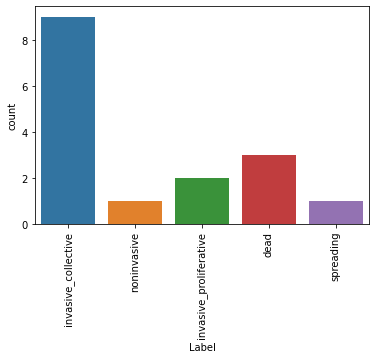

In [ ]:
#Plot distribution of invasive phenotypes among WT PyMT organoids
wild_type = df[df['Dose (nM)'] == 0]
wild_type.head(10)

wt_label_plot = sns.countplot(wild_type['Label'], label = 'count')
for i in wt_label_plot.get_xticklabels():
  i.set_rotation(90)

print(wt_label_plot) #Obviously need to go through and rename so columns are not misspelled:


(array([3., 2., 4., 1., 1., 3., 0., 1., 0., 1.]), array([ 26750.353 ,  45989.8182,  65229.2834,  84468.7486, 103708.2138,
       122947.679 , 142187.1442, 161426.6094, 180666.0746, 199905.5398,
       219145.005 ]), <a list of 10 Patch objects>)


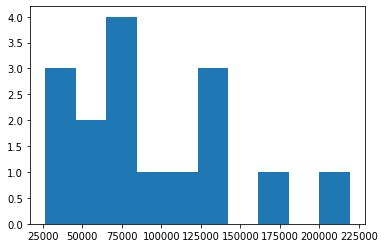

In [ ]:
#Plot histogram of area of wt organoids sampled: 
Area_hist_wt = plt.hist(wild_type['Area'])

print(Area_hist_wt)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


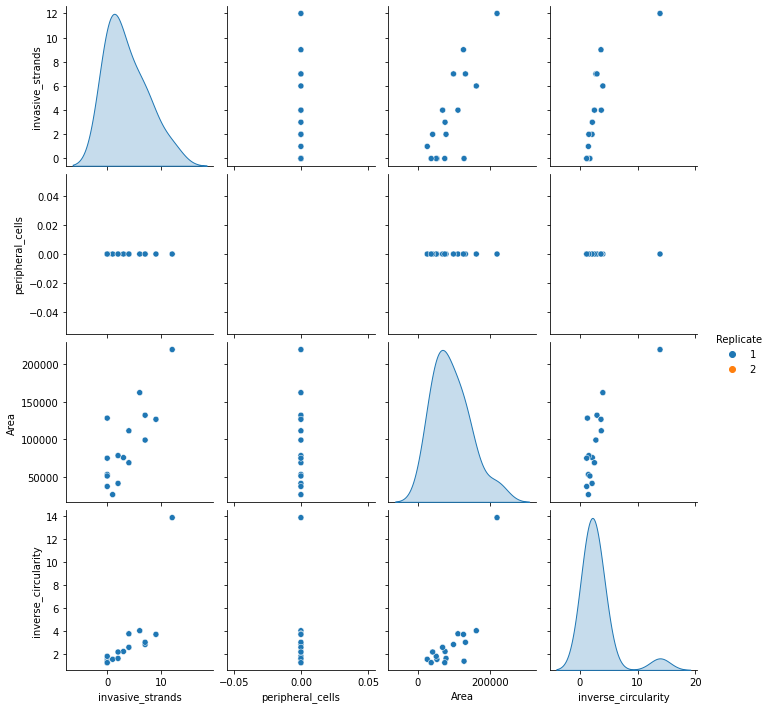

In [ ]:
#pairplot of variables in wt data: 
sns.pairplot(wild_type, 
             hue='Replicate', 
             vars=['invasive_strands', 'peripheral_cells', 'Area', 'inverse_circularity'])



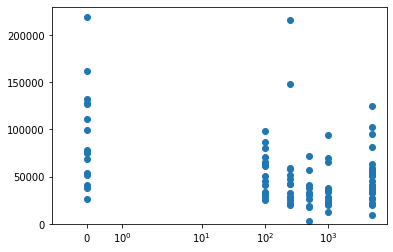

In [ ]:
#Plot dose vs inverse circularity, dose vs area, dose vs. disseminated_cells, dose vs. invasive_strands

#dose vs. area
ehop_area_scatter = plt.scatter(df['Dose (nM)'], df['Area'])
plt.xscale('symlog') #use symlog to avoid error for including negative number in x axis. 
plt.ylim(ymin=0)
plt.xlim(xmin=-1)
print(ehop_area_scatter) # Obviously this is not what we want -- need to convert dosage to categorical variable. 

Text(0, 0.5, 'Area (um^2)')

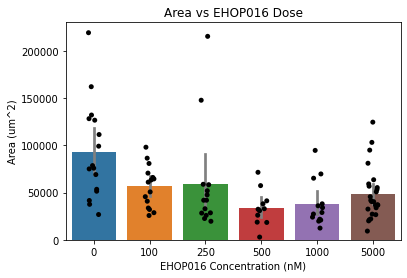

In [ ]:
#Create boxplot  for area vs dose curve. 
ehop_area_dose = sns.stripplot(x = 'Dose (nM)', y = 'Area', data = df, orient = 'v', color = 'black')
sns.barplot(x = 'Dose (nM)', y = 'Area', data = df, orient = 'v', errcolor = 'gray')
plt.title('Area vs EHOP016 Dose')
plt.xlabel('EHOP016 Concentration (nM)')
plt.ylabel('Area (um^2)')


Text(0, 0.5, 'Invasive Strands')

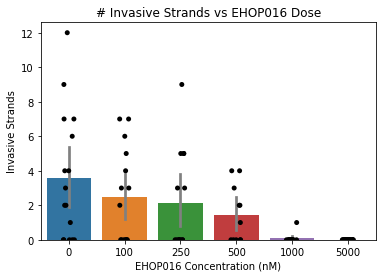

In [ ]:
#Create boxplot for invasive_strands vs dose
ehop_IS_dose = sns.stripplot(x = 'Dose (nM)', y = 'invasive_strands', data = df, orient = 'v', color = 'black')
sns.barplot(x = 'Dose (nM)', y = 'invasive_strands', data = df, orient = 'v', errcolor = 'gray')
plt.title('# Invasive Strands vs EHOP016 Dose')
plt.xlabel('EHOP016 Concentration (nM)')
plt.ylabel('Invasive Strands')

Text(0, 0.5, 'inverse circularity')

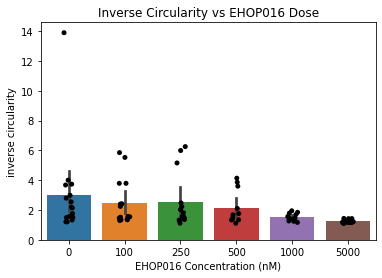

In [ ]:
#Create plot for inverse circularity vs dose
ehop_inverseCircularity_dose = sns.stripplot(x = 'Dose (nM)', y = 'inverse_circularity', data = df, orient = 'v', color = 'black')
sns.barplot(x = 'Dose (nM)', y = 'inverse_circularity', data = df, orient = 'v')
plt.title('Inverse Circularity vs EHOP016 Dose')
plt.xlabel('EHOP016 Concentration (nM)')
plt.ylabel('inverse circularity')

In [ ]:
#Calculation of percent dead grouped by dose and replicate
ehop_dose_rep= df.groupby(['Dose (nM)', 'Label']).mean()
ehop_dose_rep_count = df.groupby(['Dose (nM)', 'Label']).size().reset_index(name='counts')

#append count column pi3k_dose_rep df
ehop_dose_rep['count']=ehop_dose_rep_count['counts'].values

#Calculate percentage of each
#first, convert count to object
#ehop_dose_rep['Dose'] = pi3k_dose_rep['Dose'].astype('object')
ehop_dose_rep['pct'] = ehop_dose_rep['count']/ehop_dose_rep.groupby('Dose (nM)')['count'].sum()

ehop_dose_rep.to_csv("ehop_dose_rep.csv")

files.download("ehop_dose_rep.csv")

ehop_dose_rep

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

invasive_strands  ...       pct
Dose (nM) Label                                     ...          
0         dead                            0.000000  ...  0.187500
          invasive_collective             4.777778  ...  0.562500
          invasive_proliferative          7.000000  ...  0.125000
          noninvasive                     0.000000  ...  0.062500
          spreading                       0.000000  ...  0.062500
100       dead                            0.000000  ...  0.066667
          invasive_collective             5.166667  ...  0.400000
          invasive_proliferative          3.000000  ...  0.133333
          noninvasive                     0.000000  ...  0.400000
          spreading                            NaN  ...  0.000000
250       dead                            0.000000  ...  0.142857
          invasive_collective             4.400000  ...  0.357143
          invasive_proliferative          4.000000  ...  0.142857
          noninvasive                     0.000000  ...  0.357143
          spreading                            NaN  ...  0.000000
500       dead                            0.000000  ...  0.272727
          invasive_collective             2.800000  ...  0.454545
          invasive_proliferative          2.000000  ...  0.090909
          noninvasive                     0.000000  ...  0.181818
          spreading                            NaN  ...  0.000000
1000      dead                            0.000000  ...  0.769231
          invasive_collective                  NaN  ...  0.000000
          invasive_proliferative               NaN  ...  0.000000
          noninvasive                     0.333333  ...  0.230769
          spreading                            NaN  ...  0.000000
5000      dead                            0.000000  ...  0.960000
          invasive_collective                  NaN  ...  0.000000
          invasive_proliferative               NaN  ...  0.000000
          noninvasive                     0.000000  ...  0.040000
          spreading                            NaN  ...  0.000000

[30 rows x 10 columns]

In [ ]:
files.upload()
ehop_dose_rep = pd.read_csv('ehop_dose_rep.csv')


Saving ehop_dose_rep.csv to ehop_dose_rep (1).csv


In [ ]:
ehop_dose_rep.head()


,Dose (nM),Label,invasive_strands,peripheral_cells,Area,Circularity,Unnamed: 12,Unnamed: 13,Unnamed: 14,inverse_circularity,count,pct
0,0,dead,0.000000,0.0,80257.654000,0.802333,1.533667,0.656000,0.952000,1.249007,3,0.1875
1,0,invasive_collective,4.777778,0.0,101202.727111,0.387000,1.422000,0.730222,0.705222,3.915049,9,0.5625
2,0,invasive_proliferative,7.000000,0.0,115554.710000,0.346500,1.698500,0.589000,0.728000,2.889185,2,0.1250
3,0,noninvasive,0.000000,0.0,53440.726000,0.671000,1.169000,0.856000,0.918000,1.490313,1,0.0625
4,0,spreading,0.000000,0.0,51425.942000,0.568000,1.423000,0.703000,0.852000,1.760563,1,0.0625


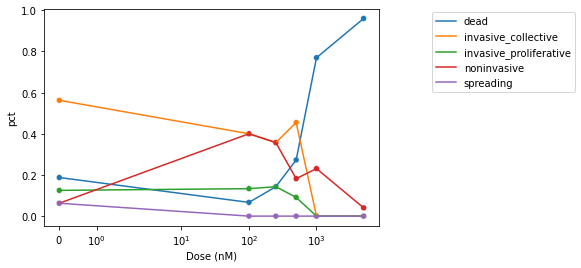

In [59]:
pct_label = sns.scatterplot(x = 'Dose (nM)', y = 'pct', data = ehop_dose_rep, hue = 'Label', legend=False) 
sns.lineplot(x = 'Dose (nM)', y = 'pct', data = ehop_dose_rep, hue = 'Label')
pct_label.set(xscale='symlog')
pct_label.legend(loc='right', bbox_to_anchor=(1.6, 0.8), ncol=1)


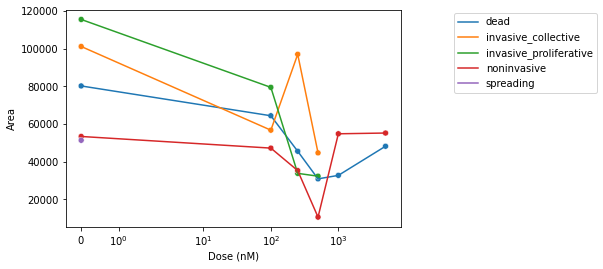

In [ ]:
#Assess Relationships between parameters in individual labels between treatments: 
area_label = sns.scatterplot(x = 'Dose (nM)', y = 'Area', data = ehop_dose_rep, hue = 'Label', legend=False)
sns.lineplot(x = 'Dose (nM)', y = 'Area', data = ehop_dose_rep, hue = 'Label')
area_label.set(xscale='symlog')
area_label.legend(loc='right', bbox_to_anchor=(1.6, 0.8), ncol=1)

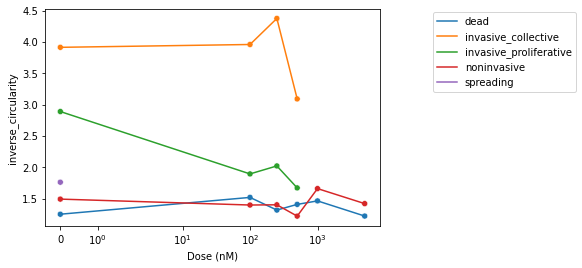

In [ ]:
invasiveness_label = sns.scatterplot(x = 'Dose (nM)', y = 'inverse_circularity', data = ehop_dose_rep, hue = 'Label', legend=False)
sns.lineplot(x = 'Dose (nM)', y = 'inverse_circularity', data = ehop_dose_rep, hue = 'Label')
invasiveness_label.set(xscale='symlog')
invasiveness_label.legend(loc='right', bbox_to_anchor=(1.6, 0.8), ncol=1)

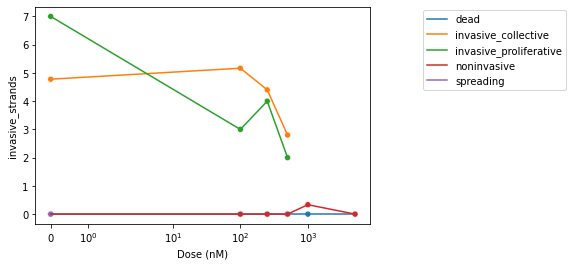

In [ ]:
IS_label = sns.scatterplot(x = 'Dose (nM)', y = 'invasive_strands', data = ehop_dose_rep, hue = 'Label', legend=False)
sns.lineplot(x = 'Dose (nM)', y = 'invasive_strands', data = ehop_dose_rep, hue = 'Label')
IS_label.set(xscale='symlog')
IS_label.legend(loc='right', bbox_to_anchor=(1.6, 0.8), ncol=1)